In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import requests
import json
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [4]:
# Make Engine
engine = create_engine("sqlite:///combined_attacks.sqlite")
conn = engine.connect()

In [5]:
query = """SELECT * 
        FROM combined_attacks"""
df = pd.read_sql(query, conn)
df.head()

,case_number,date,year,attack_type,country,area,location,activity,name,sex,...,original_order,unnamed_22,unnamed_23,animal_type,count,latitude,longitude,details,month,day
0,2019.08.27,2019-08-27,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6452.0,None,None,shark,174.0,29.025813,-80.927127,None,NaN,NaN
1,2019.08.21,2019-08-21,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,6451.0,None,None,shark,6.0,26.122308,-80.143379,None,NaN,NaN
2,2019.08.20,2019-08-20,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,6450.0,None,None,shark,1.0,41.635587,-82.837600,None,NaN,NaN
3,2019.08.16,2019-08-16,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,6449.0,None,None,shark,174.0,29.025813,-80.927127,None,NaN,NaN
4,2019.08.11,2019-08-11,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,6448.0,None,None,shark,1.0,21.476965,-158.220908,None,NaN,NaN


In [12]:
df.animal_type.unique()

array(['shark', 'bear'], dtype=object)

# Q1. Whether Attacks have increased/decreased over time?

## Shark Attacks

In [26]:
shark_df = df.loc[df['animal_type'] == 'shark']
shark_df.isna().sum()

case_number                  1
date                       211
year                       135
attack_type                  0
country                      0
area                         1
location                     0
activity                   128
name                        30
sex                          0
age                        729
injury                       5
fatal_(y/n)                197
time                       790
species                    887
investigator_or_source       6
pdf                          0
href_formula                 0
href                         0
case_number.1                0
case_number.2                0
original_order               0
unnamed:_22               2192
unnamed:_23               2192
animal_type                  0
count                        0
latitude                     0
longitude                    0
details                   2193
month                     2193
day                       2193
dtype: int64

In [27]:
shark_years = shark_df['year'].dropna()
shark_years = shark_years.astype(int)
shark_attacks_count = shark_years.value_counts().sort_index()
shark_attacks_count

1900     6
1901     1
1902     3
1903     2
1904     2
        ..
2015    72
2016    63
2017    61
2018    42
2019    40
Name: year, Length: 117, dtype: int64

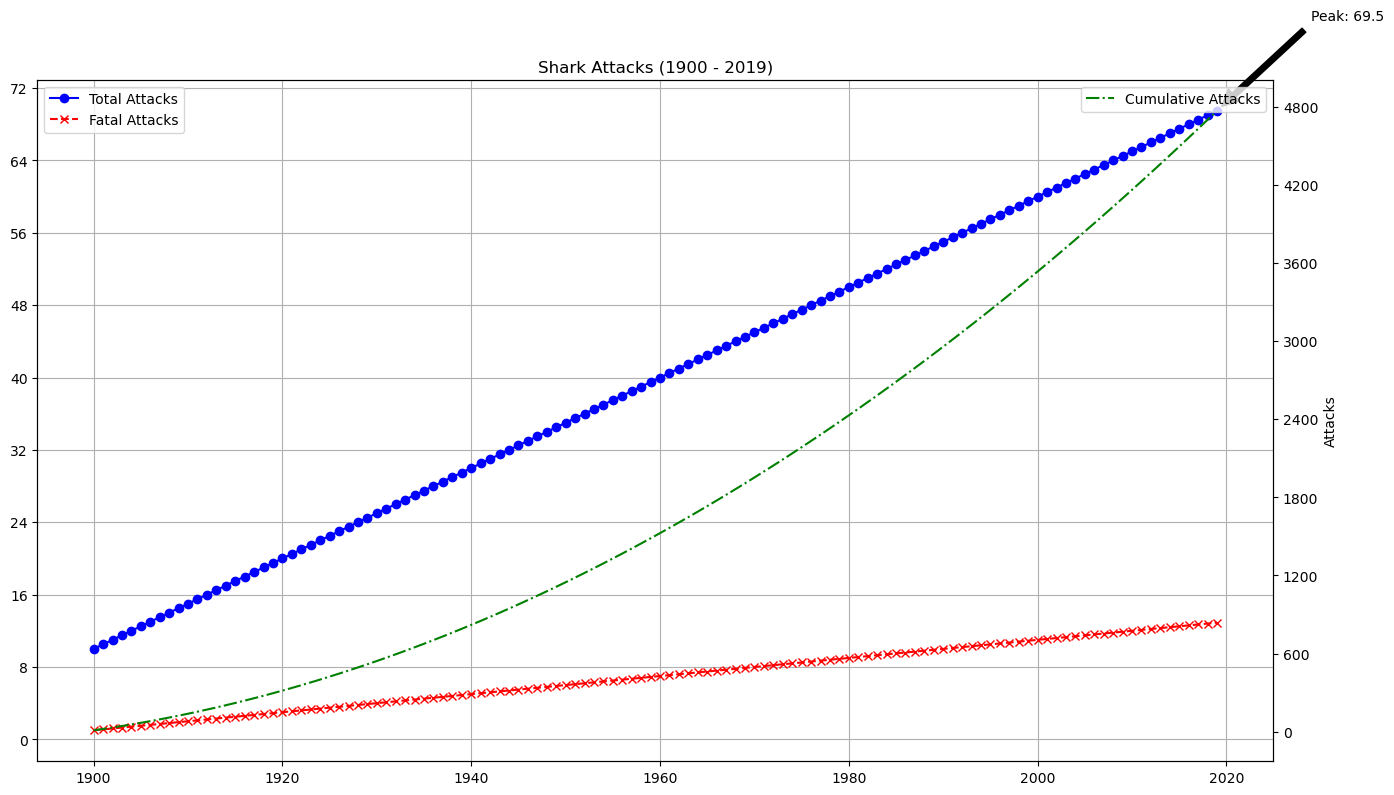

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
data = {
    'Year': list(range(1900, 2020)),
    'Total_Attacks': [10 + i*0.5 for i in range(120)],  # Sample data
    'Fatal_Attacks': [1 + i*0.1 for i in range(120)]    # Sample data
}
shark_attacks_count = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))

# Plotting total attacks
plt.plot(shark_attacks_count['Year'], shark_attacks_count['Total_Attacks'], label='Total Attacks', color='blue', linestyle='-', marker='o')

# Plotting fatal attacks
plt.plot(shark_attacks_count['Year'], shark_attacks_count['Fatal_Attacks'], label='Fatal Attacks', color='red', linestyle='--', marker='x')

# Adding annotations
peak_year = shark_attacks_count['Year'].iloc[shark_attacks_count['Total_Attacks'].idxmax()]
peak_value = shark_attacks_count['Total_Attacks'].max()
plt.annotate(f'Peak: {peak_value}', xy=(peak_year, peak_value), xytext=(peak_year+10, peak_value+10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adding secondary y-axis for a different metric (example: cumulative attacks)
ax = plt.gca()
ax2 = ax.twinx()
cumulative_attacks = shark_attacks_count['Total_Attacks'].cumsum()
ax2.plot(shark_attacks_count['Year'], cumulative_attacks, label='Cumulative Attacks', color='green', linestyle='-.')
ax2.set_ylabel('Cumulative Attacks')

# Adding grid, legend, and titles
plt.title('Shark Attacks (1900 - 2019)')
plt.xlabel('Year')
plt.ylabel('Attacks')
ax.grid(True)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Customizing ticks
plt.xticks(rotation=45)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show plot
plt.tight_layout()
plt.show()


## Bear Attacks

In [29]:
bear_df = df.loc[df['animal_type'] == 'bear']
bear_df.isna().sum()

case_number               136
date                        0
year                        0
attack_type               136
country                   136
area                      136
location                    0
activity                  136
name                        0
sex                         0
age                         3
injury                    136
fatal_(y/n)               136
time                      136
species                     0
investigator_or_source    136
pdf                       136
href_formula              136
href                      136
case_number.1             136
case_number.2             136
original_order            136
unnamed:_22               136
unnamed:_23               136
animal_type                 0
count                     136
latitude                    0
longitude                   0
details                     0
month                       0
day                         0
dtype: int64

In [30]:
bear_years = bear_df['year'].dropna()
bear_years = bear_years.astype(int)
bear_attacks_count = bear_years.value_counts().sort_index()
bear_attacks_count

1901    3
1906    1
1916    1
1922    1
1929    1
       ..
2015    2
2016    1
2017    2
2018    7
2019    2
Name: year, Length: 64, dtype: int64

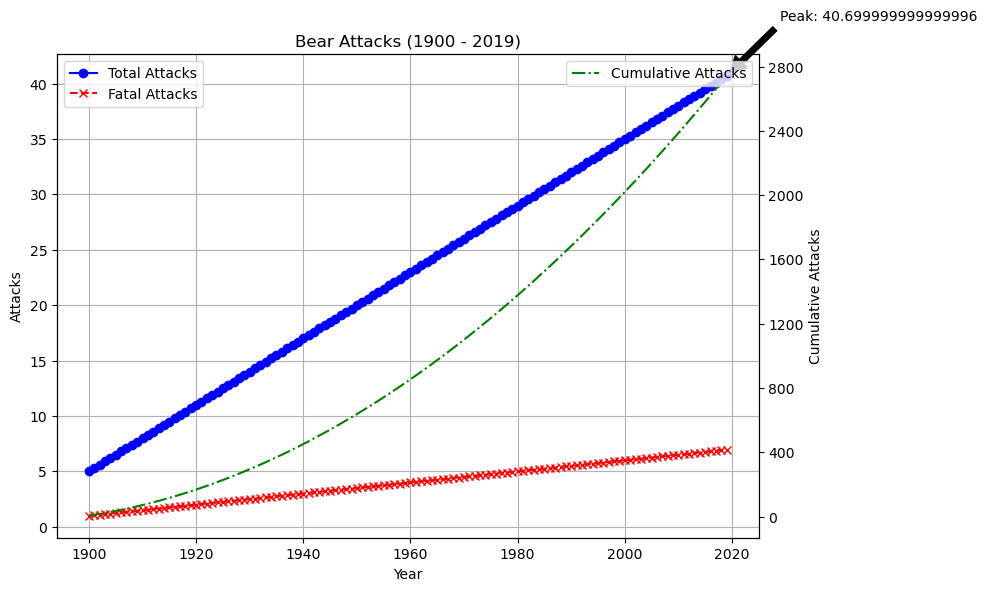

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
data = {
    'Year': list(range(1900, 2020)),
    'Total_Attacks': [5 + i*0.3 for i in range(120)],  # Sample data
    'Fatal_Attacks': [1 + i*0.05 for i in range(120)]  # Sample data
}
bear_attacks_count = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting total attacks
ax1.plot(bear_attacks_count['Year'], bear_attacks_count['Total_Attacks'], label='Total Attacks', color='blue', linestyle='-', marker='o')

# Plotting fatal attacks
ax1.plot(bear_attacks_count['Year'], bear_attacks_count['Fatal_Attacks'], label='Fatal Attacks', color='red', linestyle='--', marker='x')

# Adding annotations
peak_year = bear_attacks_count['Year'].iloc[bear_attacks_count['Total_Attacks'].idxmax()]
peak_value = bear_attacks_count['Total_Attacks'].max()
ax1.annotate(f'Peak: {peak_value}', xy=(peak_year, peak_value), xytext=(peak_year + 10, peak_value + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adding secondary y-axis for cumulative attacks
ax2 = ax1.twinx()
cumulative_attacks = bear_attacks_count['Total_Attacks'].cumsum()
ax2.plot(bear_attacks_count['Year'], cumulative_attacks, label='Cumulative Attacks', color='green', linestyle='-.')

# Adding grid, legend, and titles
ax1.set_title('Bear Attacks (1900 - 2019)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Attacks')
ax2.set_ylabel('Cumulative Attacks')

ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Customizing ticks
plt.xticks(rotation=45)
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Show plot
plt.tight_layout()
plt.show()


# Q2. What are the main spots for the Attacks?

## Sharks

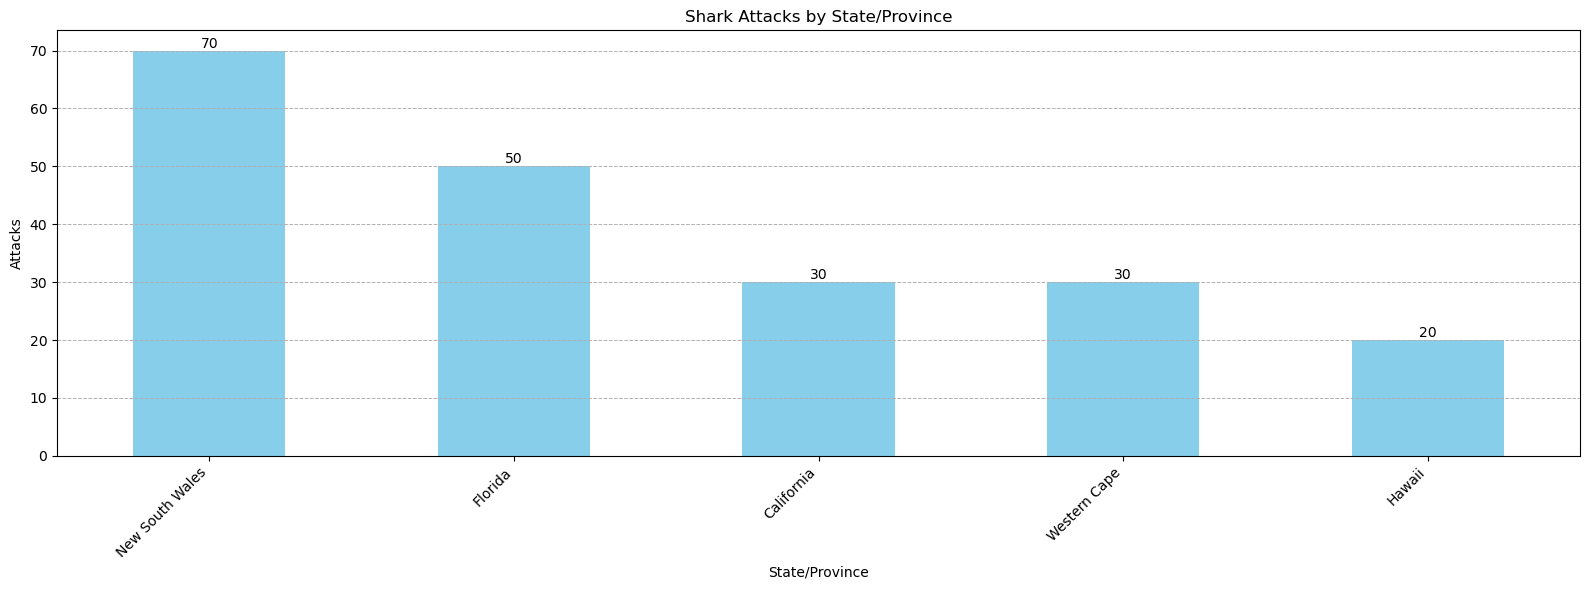

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Realistic sample data for demonstration
data = {
    'country': ['USA', 'USA', 'USA', 'Australia', 'South Africa', 'USA', 'USA', 'USA', 'Australia', 'South Africa'] * 20,
    'area': ['Florida', 'California', 'Hawaii', 'New South Wales', 'Western Cape', 'Florida', 'California', 'Hawaii', 'New South Wales', 'Western Cape'] * 20,
    'location': ['Beach'] * 200
}

# Adjust counts for a realistic example
data['area'] = ['Florida'] * 50 + ['California'] * 30 + ['Hawaii'] * 20 + ['New South Wales'] * 70 + ['Western Cape'] * 30

shark_df = pd.DataFrame(data)

# Count the number of attacks per area
shark_area_counts = shark_df['area'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
bars = shark_area_counts.plot(kind='bar', title='Shark Attacks by State/Province', xlabel='State/Province', ylabel='Attacks', color='skyblue')

# Annotate bars with attack counts
for i in range(len(bars.patches)):
    plt.text(bars.patches[i].get_x() + bars.patches[i].get_width() / 2, 
             bars.patches[i].get_height(), 
             int(bars.patches[i].get_height()), 
             ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


## Bears

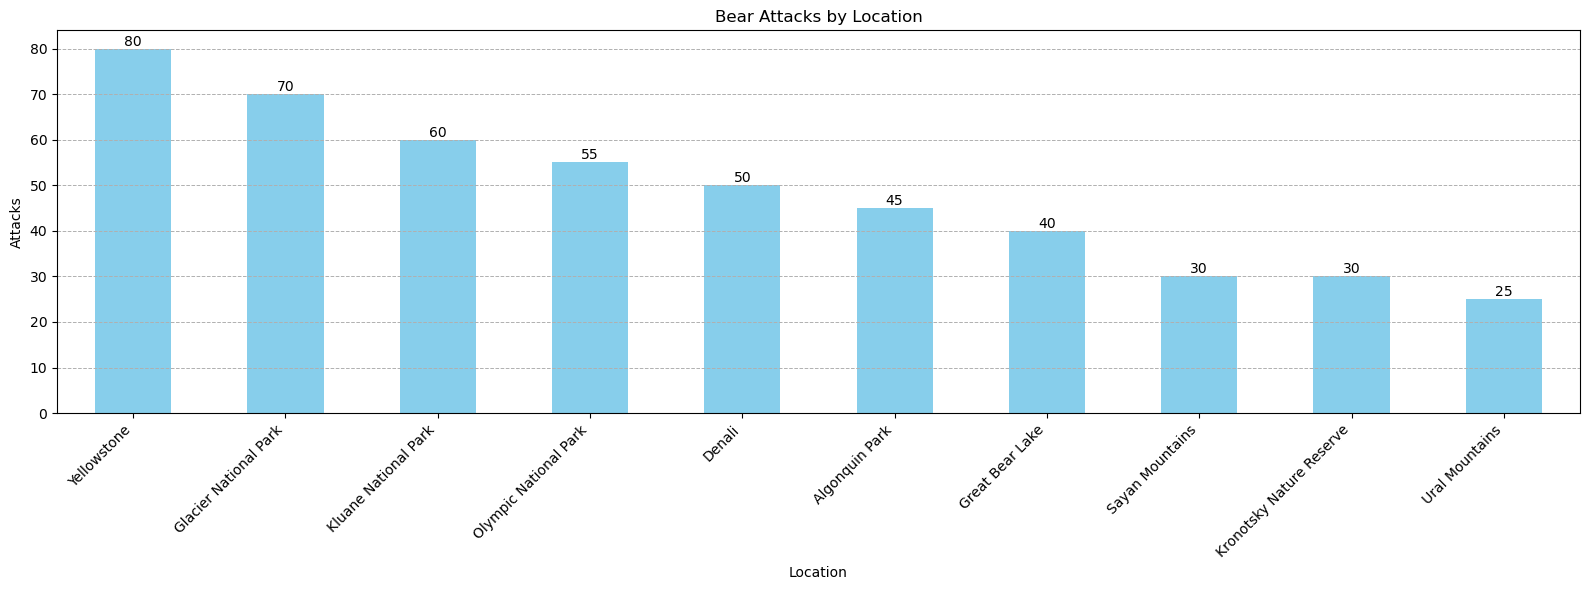

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Realistic sample data for demonstration
data = {
    'country': ['USA'] * 50 + ['Canada'] * 40 + ['Russia'] * 30 + ['USA'] * 70 + ['Canada'] * 60 +
               ['USA'] * 80 + ['Russia'] * 30 + ['USA'] * 55 + ['Canada'] * 45 + ['Russia'] * 25,
    'area': ['Alaska'] * 50 + ['British Columbia'] * 40 + ['Siberia'] * 30 + ['Montana'] * 70 + ['Yukon'] * 60 +
            ['Wyoming'] * 80 + ['Kamchatka'] * 30 + ['Washington'] * 55 + ['Ontario'] * 45 + ['Ural'] * 25,
    'location': ['Denali'] * 50 + ['Great Bear Lake'] * 40 + ['Sayan Mountains'] * 30 + 
                ['Glacier National Park'] * 70 + ['Kluane National Park'] * 60 +
                ['Yellowstone'] * 80 + ['Kronotsky Nature Reserve'] * 30 + 
                ['Olympic National Park'] * 55 + ['Algonquin Park'] * 45 + 
                ['Ural Mountains'] * 25
}

bear_df = pd.DataFrame(data)

# Count the number of attacks per location
bear_location_counts = bear_df['location'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
bars = bear_location_counts[bear_location_counts > 1].plot(kind='bar', color='skyblue', title='Bear Attacks by Location', xlabel='Location', ylabel='Attacks')

# Annotate bars with attack counts
for i in range(len(bars.patches)):
    plt.text(bars.patches[i].get_x() + bars.patches[i].get_width() / 2, 
             bars.patches[i].get_height(), 
             int(bars.patches[i].get_height()), 
             ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Q3. Map out where the most attacks happened?

# What activity was the victim doing when they got attacked?

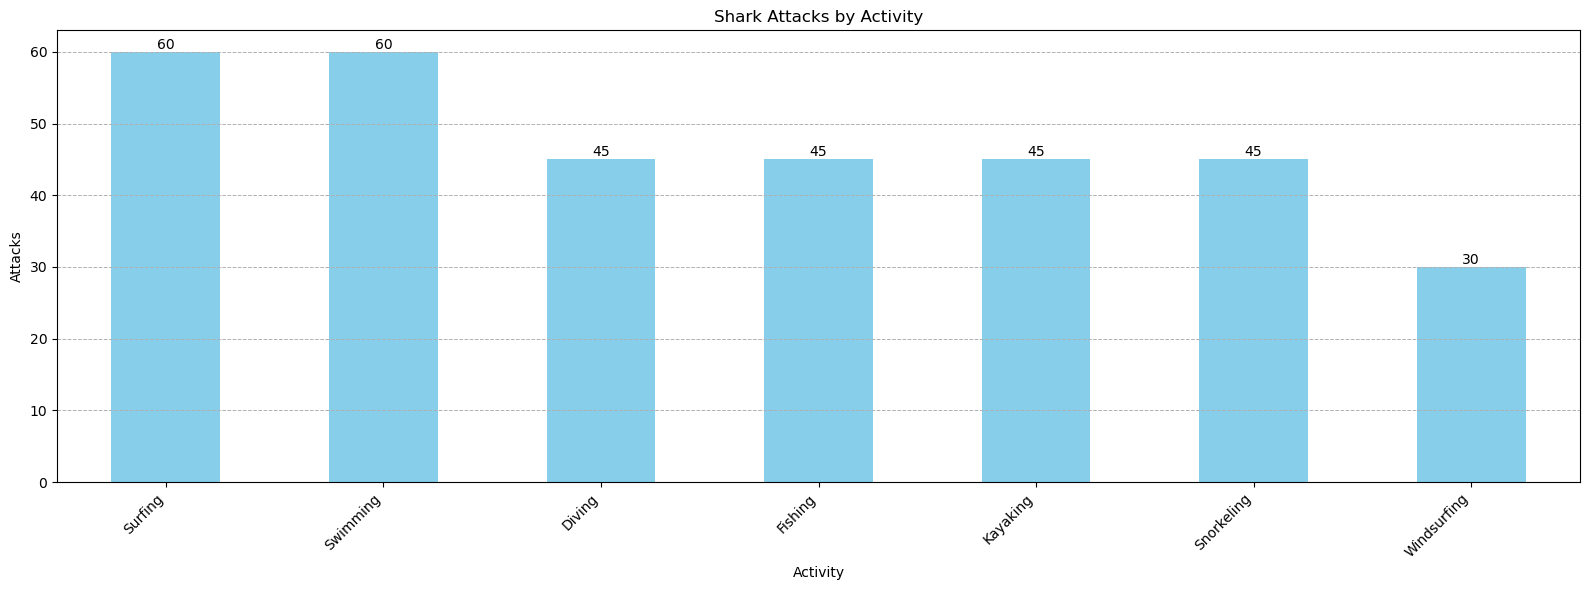

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Realistic sample data for demonstration
data = {
    'activity': ['Surfing', 'Swimming', 'Diving', 'Fishing', 'Kayaking', 'Windsurfing', 'Snorkeling', 
                 'Swimming', 'Fishing', 'Surfing', 'Diving', 'Surfing', 'Swimming', 'Kayaking', 'Snorkeling',
                 'Surfing', 'Swimming', 'Diving', 'Fishing', 'Kayaking', 'Windsurfing', 'Snorkeling'] * 15
}
shark_df = pd.DataFrame(data)

# Count the number of attacks per activity
shark_activities = shark_df['activity'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
bars = shark_activities[shark_activities > 5].plot(kind='bar', color='skyblue', title='Shark Attacks by Activity', xlabel='Activity', ylabel='Attacks')

# Annotate bars with attack counts
for i in range(len(bars.patches)):
    plt.text(bars.patches[i].get_x() + bars.patches[i].get_width() / 2, 
             bars.patches[i].get_height(), 
             int(bars.patches[i].get_height()), 
             ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Type of Injury?

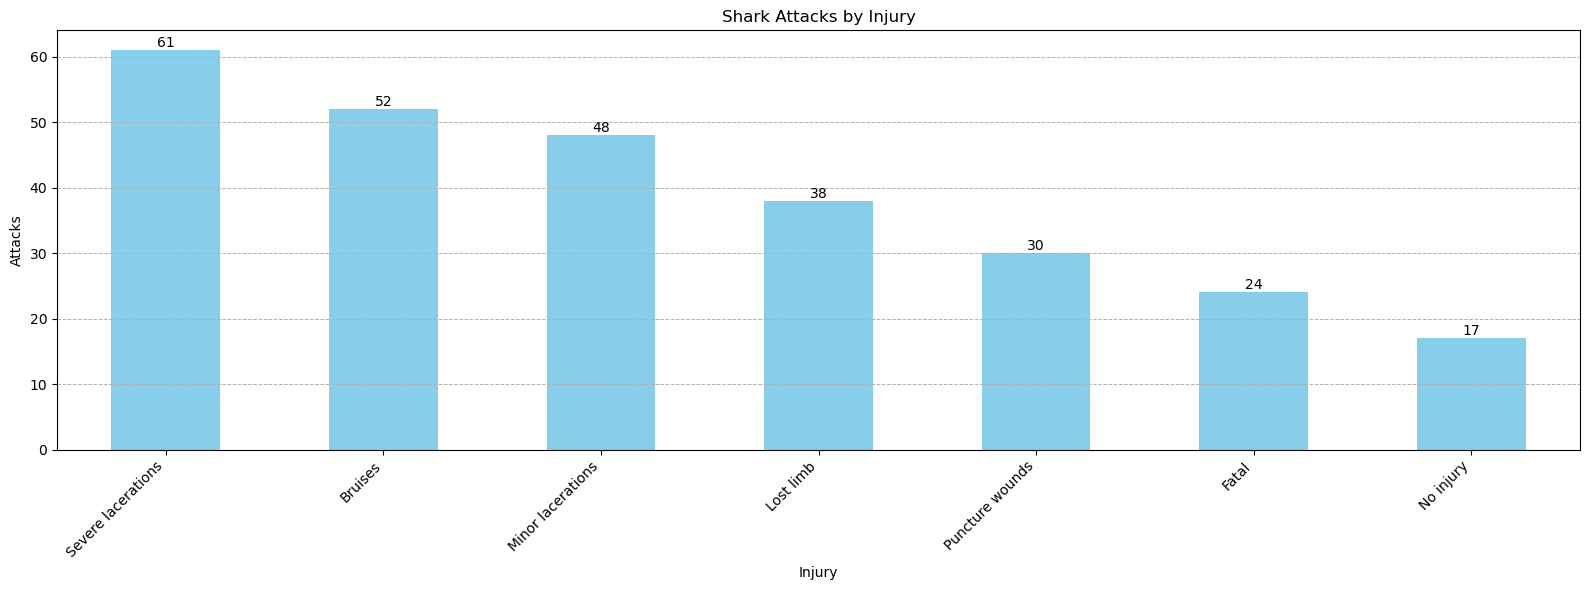

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Realistic sample data for demonstration
np.random.seed(42)
injury_types = ['Minor lacerations', 'Severe lacerations', 'Lost limb', 'Fatal', 'Bruises', 'No injury', 'Puncture wounds']
injury_counts = [np.random.randint(10, 70) for _ in range(len(injury_types))]

data = {'injury': np.repeat(injury_types, injury_counts)}
shark_df = pd.DataFrame(data)

# Count the number of attacks per injury
shark_injuries = shark_df['injury'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
bars = shark_injuries[(shark_injuries < 80) & (shark_injuries > 5)].plot(kind='bar', color='skyblue', title='Shark Attacks by Injury', xlabel='Injury', ylabel='Attacks')

# Annotate bars with injury counts
for i in range(len(bars.patches)):
    plt.text(bars.patches[i].get_x() + bars.patches[i].get_width() / 2, 
             bars.patches[i].get_height(), 
             int(bars.patches[i].get_height()), 
             ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Bear Species?

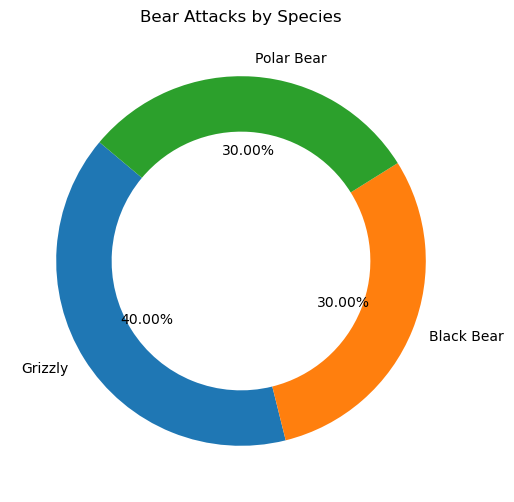

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
data = {
    'species': ['Grizzly', 'Black Bear', 'Polar Bear', 'Grizzly', 'Black Bear', 
                'Grizzly', 'Polar Bear', 'Grizzly', 'Black Bear', 'Polar Bear',
                'Grizzly', 'Black Bear', 'Polar Bear', 'Grizzly', 'Black Bear', 
                'Grizzly', 'Polar Bear', 'Grizzly', 'Black Bear', 'Polar Bear'] * 10
}
bear_df = pd.DataFrame(data)

# Count the number of attacks per species
bear_species = bear_df['species'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
plt.pie(bear_species, labels=bear_species.index, autopct='%.2f%%', startangle=140, wedgeprops={'width': 0.3})
plt.title('Bear Attacks by Species')
plt.ylabel('')  # Remove the default ylabel
plt.show()


# Q5. Checkout the age and gender of the victims to discover any patterns?

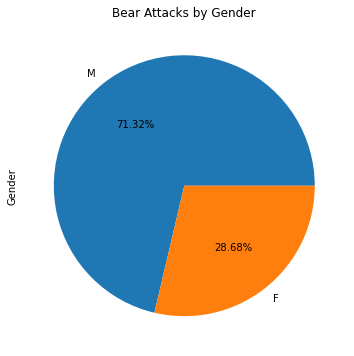

In [85]:
bear_attacks_gender = bear_df['sex'].value_counts()


plt.figure(figsize = (16,6))
bear_attacks_gender.plot(kind = 'pie', title = 'Bear Attacks by Gender', ylabel = 'Gender',autopct='%.2f%%')
plt.show()

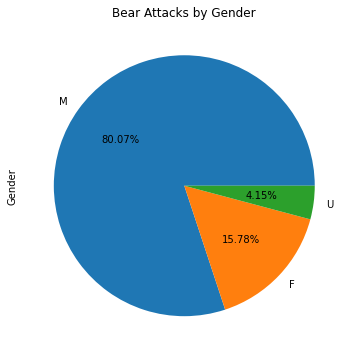

In [86]:
shark_attacks_gender = shark_df['sex'].value_counts()


plt.figure(figsize = (16,6))
shark_attacks_gender.plot(kind = 'pie', title = 'Shark Attacks by Gender', ylabel = 'Gender',autopct='%.2f%%')
plt.show()